In [29]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
elixhauser = pd.read_csv("test_final_cohort.csv")
elixhauser

,hadm_id,subject_id,icustay_id,intime,outtime,icu_los_days,admittime,dischtime,admission_type,hospital_expire_flag,...,coagulopathy,obesity,weight_loss,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression
0,100001,58526,275225,2117-09-11 11:47:35,2117-09-15 17:57:14,4.2567,2117-09-11 11:46:00,2117-09-17 16:45:00,EMERGENCY,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,54610,209281,2150-04-17 15:35:42,2150-04-19 14:12:52,1.9425,2150-04-17 15:34:00,2150-04-21 17:30:00,EMERGENCY,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100006,9895,291788,2108-04-06 15:50:15,2108-04-11 15:18:03,4.9776,2108-04-06 15:49:00,2108-04-18 17:18:00,EMERGENCY,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,100007,23018,217937,2145-03-31 10:17:23,2145-04-04 12:41:10,4.0998,2145-03-31 05:33:00,2145-04-07 12:40:00,EMERGENCY,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100009,533,253656,2162-05-17 10:18:31,2162-05-19 22:05:14,2.4908,2162-05-16 15:56:00,2162-05-21 13:37:00,EMERGENCY,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36603,199992,94911,294585,2155-02-11 17:13:23,2155-02-12 15:29:40,0.9280,2155-02-11 17:13:00,2155-02-14 14:37:00,EMERGENCY,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
36604,199993,20785,271752,2161-10-23 18:01:44,2161-11-17 08:10:41,24.5895,2161-10-23 18:01:00,2161-11-17 08:10:00,EMERGENCY,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
36605,199995,19412,255092,2137-12-20 13:50:48,2137-12-23 10:19:27,2.8532,2137-12-11 17:35:00,2137-12-28 12:30:00,EMERGENCY,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
36606,199998,27200,293589,2119-02-20 10:04:39,2119-02-21 11:34:20,1.0623,2119-02-18 16:26:00,2119-02-24 14:25:00,EMERGENCY,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
elixhauser.columns

Index(['hadm_id', 'subject_id', 'icustay_id', 'intime', 'outtime',
       'icu_los_days', 'admittime', 'dischtime', 'admission_type',
       'hospital_expire_flag', 'gender', 'age_years', 'hosp_los_days',
       'admission_type_grp', 'congestive_heart_failure', 'cardiac_arrhythmias',
       'valvular_disease', 'pulmonary_circulation', 'peripheral_vascular',
       'hypertension', 'paralysis', 'other_neurological', 'chronic_pulmonary',
       'diabetes_uncomplicated', 'diabetes_complicated', 'hypothyroidism',
       'renal_failure', 'liver_disease', 'peptic_ulcer', 'aids', 'lymphoma',
       'metastatic_cancer', 'solid_tumor', 'rheumatoid_arthritis',
       'coagulopathy', 'obesity', 'weight_loss', 'fluid_electrolyte',
       'blood_loss_anemia', 'deficiency_anemias', 'alcohol_abuse',
       'drug_abuse', 'psychoses', 'depression'],
      dtype='object')

In [32]:
print("Number of male:", elixhauser[elixhauser['gender']=='M'].shape[0])
print("Percentage of male:", elixhauser[elixhauser['gender']=='M'].shape[0] / elixhauser.shape[0] * 100)


Number of male: 21152
Percentage of male: 57.77972027972028


In [33]:
print("Number of female:", elixhauser[elixhauser['gender']=='F'].shape[0])
print("Percentage of female:", elixhauser[elixhauser['gender']=='F'].shape[0] / elixhauser.shape[0] * 100)

Number of female: 15456
Percentage of female: 42.22027972027972


## Median Of Morbidity count (IQR)

Notice: From the Definitions of Comorbidities table, they combine Hypertension,uncomplicated (htn) and Hypertension,comlicated(htncx) to Hypertension (combined)

In [34]:
# elixhauser['ht'] = elixhauser['htn'] + elixhauser['htncx']

In [35]:
elixhauser_index = ['congestive_heart_failure', 'cardiac_arrhythmias', 'valvular_disease',
       'pulmonary_circulation', 'peripheral_vascular', 'hypertension',
       'paralysis', 'other_neurological', 'chronic_pulmonary',
       'diabetes_uncomplicated', 'diabetes_complicated', 'hypothyroidism',
       'renal_failure', 'liver_disease', 'peptic_ulcer', 'aids', 'lymphoma',
       'metastatic_cancer', 'solid_tumor', 'rheumatoid_arthritis',
       'coagulopathy', 'obesity', 'weight_loss', 'fluid_electrolyte',
       'blood_loss_anemia', 'deficiency_anemias', 'alcohol_abuse',
       'drug_abuse', 'psychoses', 'depression']

In [36]:
len(elixhauser_index)

30

In [37]:
elixhauser_count = elixhauser[elixhauser_index].sum(axis=1)
median_count = np.median(elixhauser_count)
print("Median of Morbidity count:", median_count)

Median of Morbidity count: 3.0


## Percent with Multimorbidity

In [38]:
print("Percentage of patients with multipmorbidity:", sum(elixhauser[elixhauser_index].sum(axis=1) >= 2)/elixhauser.shape[0] * 100)

Percentage of patients with multipmorbidity: 76.81654283216784


In [39]:
female_elixhauser = elixhauser[elixhauser['gender']=='F']

In [40]:
print("Percentage of female patients with multimorbidity:", sum(female_elixhauser[elixhauser_index].sum(axis=1) >= 2)/female_elixhauser.shape[0] * 100)

Percentage of female patients with multimorbidity: 78.4679089026915


In [41]:
male_exlixhauser = elixhauser[elixhauser['gender']=='M']
print("Percentage of male patients with multimorbidity:", sum(male_exlixhauser[elixhauser_index].sum(axis=1) >= 2)/male_exlixhauser.shape[0] * 100)

Percentage of male patients with multimorbidity: 75.60987140695914


### AGE GROUP

In [42]:
first_age_group = elixhauser[elixhauser['age_years'] <= 24]
print(sum(first_age_group[elixhauser_index].sum(axis=1) >= 2)/first_age_group.shape[0] * 100)

32.36301369863014


In [43]:
second_age_group = elixhauser[(elixhauser['age_years'] > 24) & (elixhauser['age_years'] <= 44)]
print(sum(second_age_group[elixhauser_index].sum(axis=1) >= 2)/second_age_group.shape[0] * 100)

55.93708462560921


In [44]:
third_age_group = elixhauser[(elixhauser['age_years'] > 44) & (elixhauser['age_years'] <= 64)]
print(sum(third_age_group[elixhauser_index].sum(axis=1) >= 2)/third_age_group.shape[0] * 100)

74.42861615529117


In [45]:
fourth_age_group = elixhauser[(elixhauser['age_years'] > 64) & (elixhauser['age_years'] <= 84)]
print(sum(fourth_age_group[elixhauser_index].sum(axis=1) >= 2)/fourth_age_group.shape[0] * 100)

85.96034066353121


In [46]:
fifth_age_group = elixhauser[elixhauser['age_years'] > 84]
print(sum(fifth_age_group[elixhauser_index].sum(axis=1) >= 2)/fifth_age_group.shape[0] * 100)

90.39735099337747


In [56]:

# 16-24, 25-44, 45-64, 65-84, >85
age_order = ['16-24', '25-44', '45-64', '65-84', '>85']

# for fig-1a
def age_brackets(age):
    if age >= 16 and age <= 24:
        return '16-24'
    elif age >= 25 and age <=44:
        return '25-44'
    elif age >= 45 and age <= 64:
        return '45-64'
    elif age >= 65 and age <= 84:
        return '65-84'
    else:
        return '>85'
    
    
cohort = elixhauser.copy()
cohort['age_brackets'] = cohort['age_years'].apply(age_brackets)
cohort['age_brackets'] = pd.Categorical(
    cohort['age_brackets'],
    categories=age_order,
    ordered=True
)


In [57]:
cohort['comorbidities'] = cohort[elixhauser_index].sum(axis=1)
cohort['multimorbidity'] = (cohort['comorbidities'] >= 2).astype(int)


In [58]:
fig_1a = (
    cohort.groupby('age_brackets')['multimorbidity']
      .agg(['mean', 'count'])
      .reset_index()
      .rename(columns={'mean': 'pct_multimorbidity', 'count': 'n'})
)
fig_1a['pct_multimorbidity'] *= 100
fig_1a['se'] = np.sqrt(
    fig_1a['pct_multimorbidity']*(100-fig_1a['pct_multimorbidity'])/fig_1a['n']
)


fig_1a


/var/folders/qp/dsjzkwhd6gz1p6cvsjsh0ktm0000gn/T/ipykernel_7038/3296133022.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohort.groupby('age_brackets')['multimorbidity']


,age_brackets,pct_multimorbidity,n,se
0,16-24,32.363014,1168,1.368974
1,25-44,55.937085,4514,0.738934
2,45-64,74.428616,12776,0.385967
3,65-84,85.960341,15734,0.276954
4,>85,90.397351,2416,0.599411


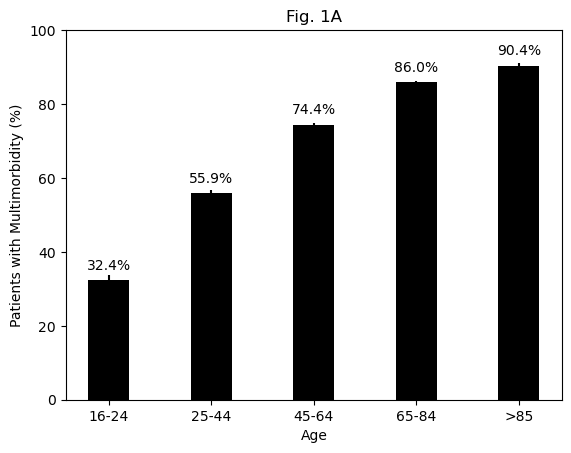

In [59]:
bars = plt.bar(
    fig_1a['age_brackets'],
    fig_1a['pct_multimorbidity'],
    yerr=fig_1a['se'],
    color='black',
    width=0.4
)
plt.xlabel('Age')
plt.ylabel('Patients with Multimorbidity (%)')
plt.ylim(0,100)
plt.title('Fig. 1A')

for bar, value in zip(bars, fig_1a['pct_multimorbidity']):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 2,
        f'{value:.1f}%',
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.show()





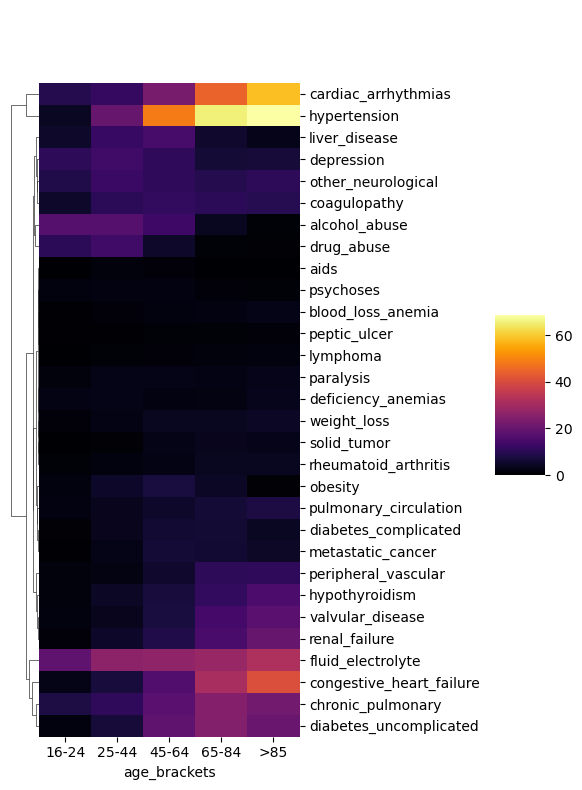

In [60]:
df = cohort.copy().groupby('age_brackets', observed=False)[elixhauser_index].mean().T.fillna(0) * 100
sns.clustermap(
    df,
    cmap='inferno',
    row_cluster=True,
    col_cluster=False,
    figsize=(5, 8),
    yticklabels=True,
    xticklabels=True,
    dendrogram_ratio=(.1, .1),
    cbar_pos=(1, 0.4, 0.1, 0.2)

)

In [52]:
# sns.heatmap(cohort[['age_brackets'] + elixhauser_index])

In [61]:
# df.to_csv('fig1b.csv')

In [54]:
df

age_brackets,0-24,25-44,45-64,65-84,>85
congestive_heart_failure,0.0,7.118720,16.227276,31.041282,40.455487
cardiac_arrhythmias,0.0,11.849516,22.601716,44.698174,58.260870
valvular_disease,0.0,3.739581,7.358149,14.388398,17.556936
pulmonary_circulation,0.0,3.536833,5.264815,6.685325,8.033126
peripheral_vascular,0.0,2.185177,5.595341,10.705426,10.890269
hypertension,0.0,20.048737,48.731997,65.406127,68.584437
paralysis,0.0,2.748367,2.722909,2.550728,3.188406
other_neurological,0.0,12.345123,10.805068,9.248776,10.517598
chronic_pulmonary,0.0,10.858301,17.415598,24.871191,21.821946
diabetes_uncomplicated,0.0,6.867523,18.542580,24.640905,20.115894


In [62]:
cohort[['age_brackets'] + elixhauser_index].groupby('age_brackets').mean()['hypertension']

/var/folders/qp/dsjzkwhd6gz1p6cvsjsh0ktm0000gn/T/ipykernel_7038/3486920776.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohort[['age_brackets'] + elixhauser_index].groupby('age_brackets').mean()['hypertension']


age_brackets
16-24    0.041952
25-44    0.200487
45-64    0.487320
65-84    0.654061
>85      0.685844
Name: hypertension, dtype: float64

In [69]:
cohort.columns

Index(['hadm_id', 'subject_id', 'icustay_id', 'intime', 'outtime',
       'icu_los_days', 'admittime', 'dischtime', 'admission_type',
       'hospital_expire_flag', 'gender', 'age_years', 'hosp_los_days',
       'admission_type_grp', 'congestive_heart_failure', 'cardiac_arrhythmias',
       'valvular_disease', 'pulmonary_circulation', 'peripheral_vascular',
       'hypertension', 'paralysis', 'other_neurological', 'chronic_pulmonary',
       'diabetes_uncomplicated', 'diabetes_complicated', 'hypothyroidism',
       'renal_failure', 'liver_disease', 'peptic_ulcer', 'aids', 'lymphoma',
       'metastatic_cancer', 'solid_tumor', 'rheumatoid_arthritis',
       'coagulopathy', 'obesity', 'weight_loss', 'fluid_electrolyte',
       'blood_loss_anemia', 'deficiency_anemias', 'alcohol_abuse',
       'drug_abuse', 'psychoses', 'depression', 'age_brackets',
       'comorbidities', 'multimorbidity'],
      dtype='object')